In [19]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *

data = {
    'x1': load_data('../stats/fpm_3_x1.json'),
    'x2': load_data('../stats/fpm_3_x2.json'),
    'x3': load_data('../stats/fpm_3_x3.json'),

    # 'Fine': load_data('../stats/fpm_4_solver_1.json'),
}
data = data['x2']

Text(0.5, 0, '# matrix')

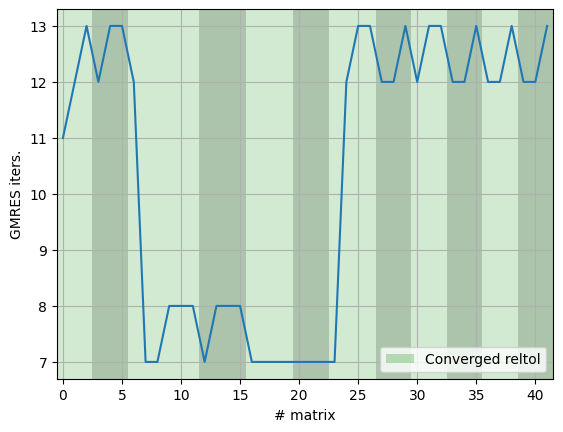

In [20]:
# %matplotlib ipympl

color_converged_reason(data)
color_time_steps(data)
plt.plot(get_gmres_iterations(data))
plt.ylabel('GMRES iters.')
plt.xlabel('# matrix')
# plt.yscale('log')

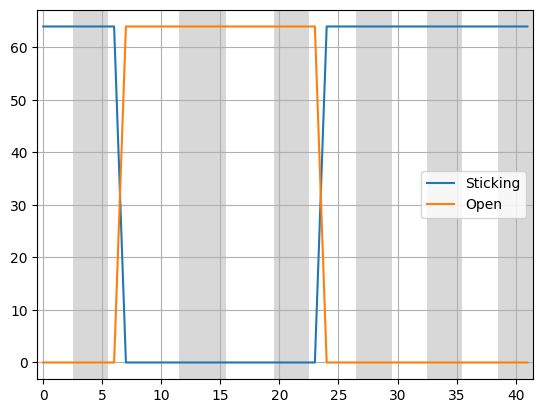

In [21]:
sticking, sliding, open_ = get_num_sticking_sliding_open(data)
# color_converged_reason(data, legend=False)
color_time_steps(data)
plt.plot(sticking, label='Sticking')
# plt.plot(sliding, label='Sliding')
plt.plot(open_, label='Open')
plt.legend()

Text(0.5, 0, '# matrix')

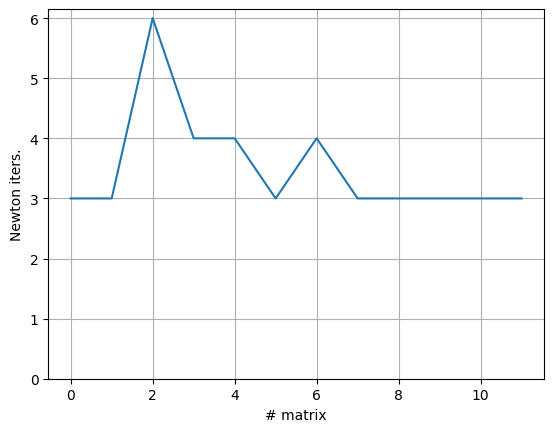

In [22]:
plt.plot(get_newton_iterations(data))
plt.ylabel('Newton iters.')
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('# matrix')

In [23]:
# import scipy.sparse
# from pathlib import Path
# from plot_utils import *


# mat, rhs = load_matrix_rhs(data, 10)

In [24]:
# import porepy as pp
# import numpy as np   
# from mat_utils import *
# from plot_utils import *
# from fpm_3 import make_model

# model = make_model()
# model.prepare_simulation()

# model.before_nonlinear_loop()
# model.before_nonlinear_iteration()

# model._initialize_solver()

# model.linear_system = mat, rhs
# perm_mat, prec_orig = model._prepare_solver()

In [25]:
# solve_petsc(perm_mat.mat, prec_orig, rhs=perm_mat.local_rhs(rhs), tol=1e-10)

In [26]:
# perm_mat.color_spy()

In [27]:
# perm_mat.shape